# **DATASET PREPARATION**

### **IMPORT LIBRARY**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
import shutil
import random

from google.colab import drive
import gdown

### **DOWNLOAD DATASET AND UNMOUNTING DRIVE**

In [ ]:
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [ ]:
file_id = '1pB9X0W2PWfN55kagCNA4TsR0RWSg5PAz'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'DATASET_CLEAN.zip', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1pB9X0W2PWfN55kagCNA4TsR0RWSg5PAz
From (redirected): https://drive.google.com/uc?id=1pB9X0W2PWfN55kagCNA4TsR0RWSg5PAz&confirm=t&uuid=bb81b2a5-9555-488f-b665-7c37fdb98757
To: /content/DATASET_CLEAN.zip
100%|██████████| 4.75G/4.75G [01:16<00:00, 62.4MB/s]


'DATASET_CLEAN.zip'

In [ ]:
!unzip DATASET_CLEAN.zip

Streaming output truncated to the last 5000 lines.
  inflating: DATASET_FINAL2/Mild_DR/1020_right._aug_0.jpeg  
  inflating: DATASET_FINAL2/Mild_DR/1020_right._aug_0._aug_9.jpeg  
  inflating: DATASET_FINAL2/Mild_DR/1020_right._aug_6.jpeg  
  inflating: DATASET_FINAL2/Mild_DR/1027_left.jpeg  
  inflating: DATASET_FINAL2/Mild_DR/1027_left._aug_20.jpeg  
  inflating: DATASET_FINAL2/Mild_DR/1027_left._aug_20._aug_21.jpeg  
  inflating: DATASET_FINAL2/Mild_DR/1036_left._aug_1.jpeg  
  inflating: DATASET_FINAL2/Mild_DR/1036_left._aug_25.jpeg  
  inflating: DATASET_FINAL2/Mild_DR/1036_right.jpeg  
  inflating: DATASET_FINAL2/Mild_DR/1036_right._aug_18.jpeg  
  inflating: DATASET_FINAL2/Mild_DR/1036_right._aug_18._aug_31.jpeg  
  inflating: DATASET_FINAL2/Mild_DR/1036_right._aug_27.jpeg  
  inflating: DATASET_FINAL2/Mild_DR/1043_left.jpeg  
  inflating: DATASET_FINAL2/Mild_DR/1043_left._aug_14._aug_6.jpeg  
  inflating: DATASET_FINAL2/Mild_DR/1077_left.jpeg  
  inflating: DATASET_FINAL2/Mild_

### **SPLIT DATASET WITH FORMULA 80, 10, 10**

In [ ]:
#PEMBAGIAN DATASET DENGAN KOMPOSISI 80,10,10 (TRAINNING, VALIDATION, DAN TESTING)

def splitting_dataset(SUMBER_DATA, DATA_TRAINNING, DATA_VALIDATION, DATA_TESTING, SPLIT_SIZE=(0.8, 0.1, 0.1)):
    all_images = os.listdir(SUMBER_DATA)
    all_images = [x for x in all_images if os.path.isfile(os.path.join(SUMBER_DATA, x))]

    random.shuffle(all_images)

    train_Proportion = int(len(all_images) * SPLIT_SIZE[0])
    validation_Proportion = int(len(all_images) * SPLIT_SIZE[1])
    test_Proportion = int(len(all_images) * SPLIT_SIZE[2])

    trainning_images = all_images[:train_Proportion]
    validation_images = all_images[train_Proportion:train_Proportion + validation_Proportion]
    test_images = all_images[train_Proportion + validation_Proportion:]

    #Pindahkan ke Folder Tujuan

    def pindah_ke_folder(files, DATASET):
      os.makedirs(DATASET, exist_ok=True)
      for file in files:
        shutil.move(os.path.join(SUMBER_DATA, file), os.path.join(DATASET, file))

    pindah_ke_folder(trainning_images, DATA_TRAINNING)
    pindah_ke_folder(validation_images, DATA_VALIDATION)
    pindah_ke_folder(test_images, DATA_TESTING)


In [ ]:
#KATEGORI PENYAKIT
KATEGORI_PENYAKIT = {
    'Immature', 'Mature', 'MataNormal', 'Normal_DR', 'Mild_DR', 'Moderate_DR', 'Severe_DR', 'Proliferate_DR', 'infected_eye'}


In [ ]:
MAIN_FOLDER = '/content/DATASET_FINAL2'
TRAIN_FOLDER_NEW = '/content/DATASET/train'
VALIDATION_FOLDER_NEW = '/content/DATASET/validation'
TEST_FOLDER_NEW = '/content/DATASET/test'

In [ ]:
  #JALANKAN PEMBAGIAN DATASET
for kategori in KATEGORI_PENYAKIT:
        Folder_Source = os.path.join(MAIN_FOLDER, kategori)
        Folder_Trainning = os.path.join(TRAIN_FOLDER_NEW, kategori)
        Folder_Validation = os.path.join(VALIDATION_FOLDER_NEW, kategori)
        Folder_Testing = os.path.join(TEST_FOLDER_NEW, kategori)

        splitting_dataset(Folder_Source, Folder_Trainning, Folder_Validation, Folder_Testing)

In [ ]:
#LIHAT PEMBAGIAN DATASET UNTUK IMAGES NO_DR
#TRAINNING 800, VALIDATION DAN TEST 100

NEW_MAIN_FOLDER = '/content/DATASET'
train_location = os.path.join(NEW_MAIN_FOLDER, 'train')
validation_location = os.path.join(NEW_MAIN_FOLDER, 'validation')
test_location = os.path.join(NEW_MAIN_FOLDER, 'test')


train_NO_DR = os.path.join(train_location, 'infected_eye')
val_NO_DR = os.path.join(validation_location, 'infected_eye')
test_NO_DR = os.path.join(test_location, 'infected_eye')

print(f'total training NO_DR images: {len(os.listdir(train_NO_DR))}')
print(f'total validation NO_DR images: {len(os.listdir(val_NO_DR))}')
print(f'total test NO_DR images: {len(os.listdir(test_NO_DR))}')

total training NO_DR images: 800
total validation NO_DR images: 100
total test NO_DR images: 100


### **MOUNTING DRIVE AND SAVING NEW DATASET**

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_path = '/content/drive/MyDrive/DATASET.zip'
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', NEW_MAIN_FOLDER)

# **DATA PREPROCESSING**

### **USING GPU FOR FASTER PROCESS (OPTIONAL)**

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

### **IMPORT LIBRARY**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
from PIL import Image
import os
import cv2
import numpy as np

### **SETTING DIRECTORY DATASET**

In [ ]:
TRAIN_DIR = '/content/DATASET/train'
VAL_DIR = '/content/DATASET/validation'

TRAIN_CLASSES = os.listdir(TRAIN_DIR)
VAL_CLASSES = os.listdir(VAL_DIR)

In [ ]:
print("\nTrain Classes:")
for classes in TRAIN_CLASSES:
    if os.path.isdir(os.path.join(TRAIN_DIR, classes)):
        print(classes)


Train Classes:
Mature
MataNormal
Mild_DR
Moderate_DR
Normal_DR
Proliferate_DR
Severe_DR
infected_eye
Immature


### **RESIZING DATA**

#### **TRAIN DATASET**


Mature
Total Images: 800
Resolution of First Image: (224, 224, 3)


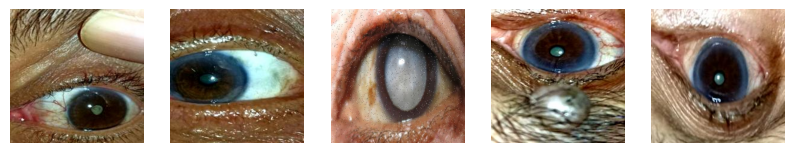


MataNormal
Total Images: 800
Resolution of First Image: (224, 224, 3)


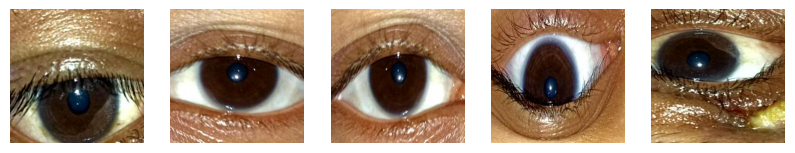


Mild_DR
Total Images: 800
Resolution of First Image: (512, 512, 3)


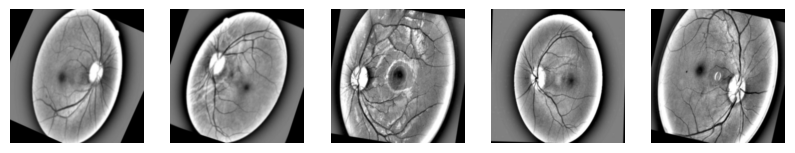


Moderate_DR
Total Images: 800
Resolution of First Image: (512, 512, 3)


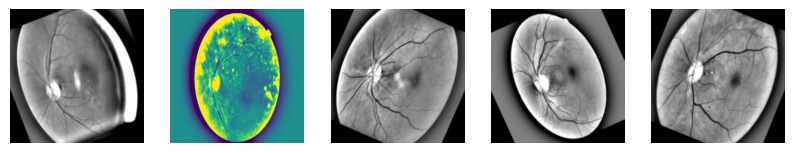


Normal_DR
Total Images: 800
Resolution of First Image: (512, 512)


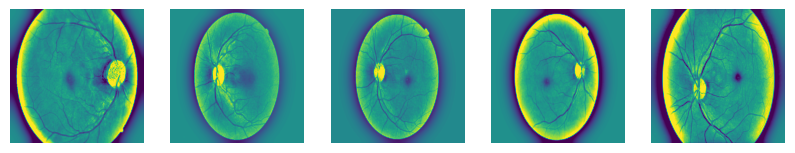


Proliferate_DR
Total Images: 800
Resolution of First Image: (512, 512)


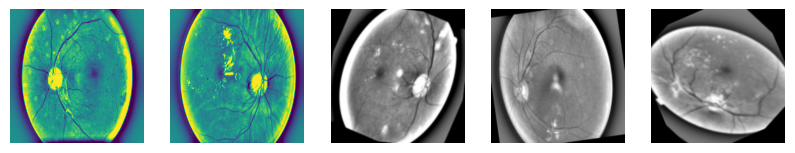


Severe_DR
Total Images: 800
Resolution of First Image: (512, 512, 3)


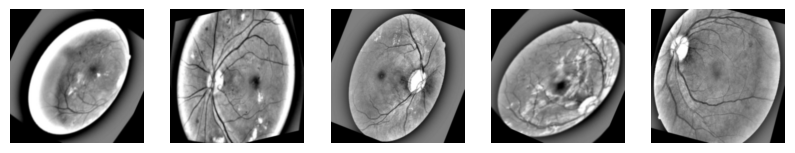


infected_eye
Total Images: 800
Resolution of First Image: (4000, 3000, 3)


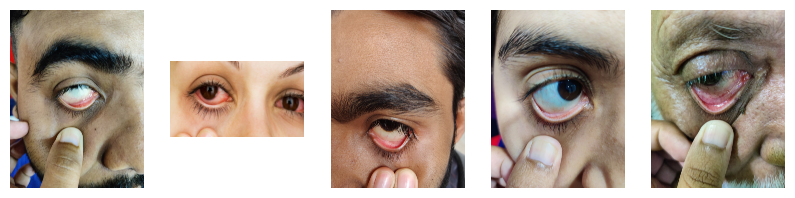


Immature
Total Images: 800
Resolution of First Image: (224, 224, 3)


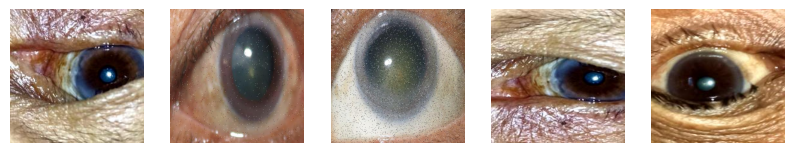

In [ ]:
for item in TRAIN_CLASSES:
  print("")
  print(item)
  class_dir = os.path.join(TRAIN_DIR, item)
  class_images = os.listdir(class_dir)

  # Total images in each classes
  num_images = len(class_images)
  print("Total Images:", num_images)

  # Resolution/size of each first image in class
  img_path = os.path.join(class_dir, class_images[0])
  img = mpimg.imread(img_path)
  image_shape = img.shape
  print("Resolution of First Image:", image_shape)

  # Show Image
  plt.figure(figsize=(10, 5))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

In [ ]:
# New Directory for Resized Dataset
resized_dir = "/content/drive/MyDrive/Capstone/resized"
os.makedirs(resized_dir, exist_ok=True)

# Pixel Normalization
def normalize_image(image):
    normalized_image = image.astype(np.float32) / 255.0
    return normalized_image

# Resize and Normalize Images
for item in TRAIN_CLASSES:
    class_dir = os.path.join(TRAIN_DIR, item)
    class_images = os.listdir(class_dir)

    for i, img_path in enumerate(class_images):
        img = Image.open(os.path.join(class_dir, img_path))
        resized_img = img.resize((224, 224))
        normalized_img = normalize_image(np.array(resized_img))

        # Save Resized and Normalized Image to resized_dir
        save_path = os.path.join(resized_dir, item, img_path)
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        Image.fromarray((normalized_img * 255).astype(np.uint8)).save(save_path)


Mature
Total Images: 800
Resolution of Arfter Resized: (224, 224, 3)


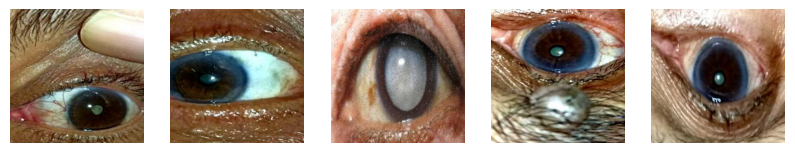


MataNormal
Total Images: 800
Resolution of Arfter Resized: (224, 224, 3)


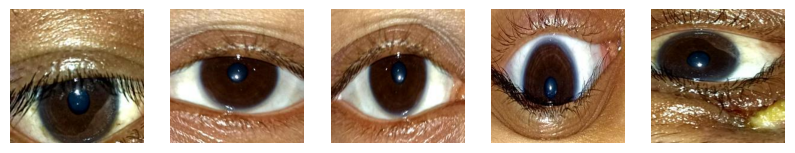


Mild_DR
Total Images: 800
Resolution of Arfter Resized: (224, 224, 3)


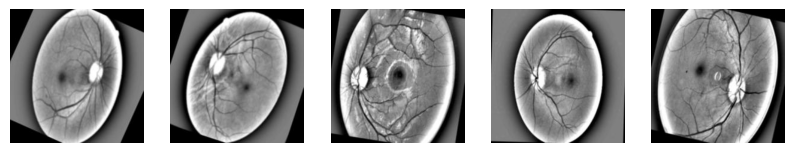


Moderate_DR
Total Images: 800
Resolution of Arfter Resized: (224, 224, 3)


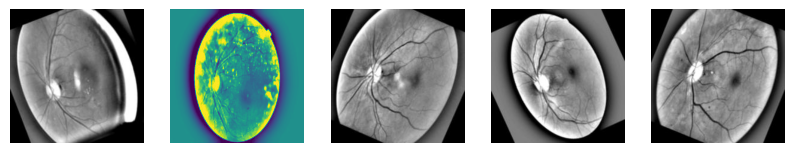


Normal_DR
Total Images: 800
Resolution of Arfter Resized: (224, 224)


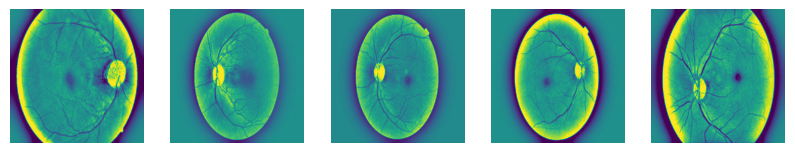


Proliferate_DR
Total Images: 800
Resolution of Arfter Resized: (224, 224)


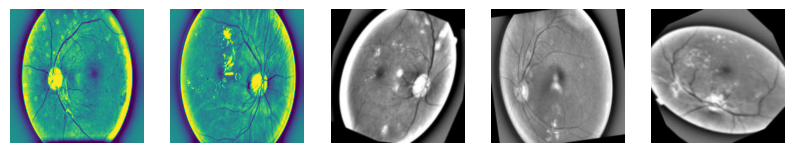


Severe_DR
Total Images: 800
Resolution of Arfter Resized: (224, 224, 3)


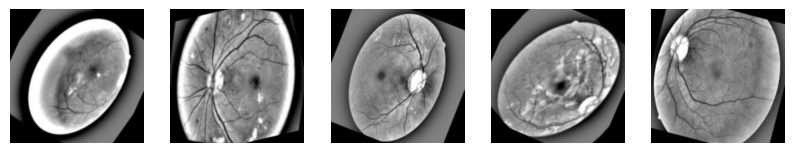


infected_eye
Total Images: 800
Resolution of Arfter Resized: (224, 224, 3)


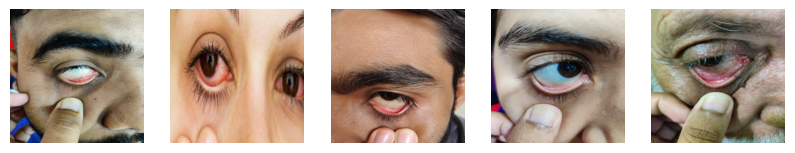


Immature
Total Images: 800
Resolution of Arfter Resized: (224, 224, 3)


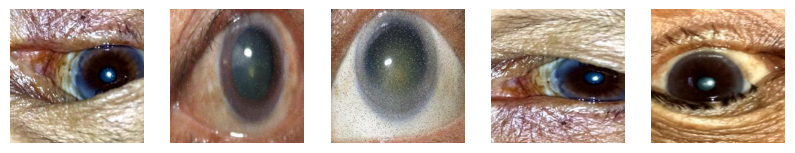

In [ ]:
resized_dir = "/content/drive/MyDrive/Capstone/resized"

# Preview Image from Balanced Dataset
for item in TRAIN_CLASSES:
  print("")
  print(item)
  class_dir = os.path.join(resized_dir, item)
  class_images = os.listdir(class_dir)

  # Total images in each classes
  num_images = len(class_images)
  print("Total Images:", num_images)

  # Resolution/size of each first image in class
  img_path = os.path.join(class_dir, class_images[0])
  img = mpimg.imread(img_path)
  image_shape = img.shape
  print("Resolution of Arfter Resized:", image_shape)

  # Showing some images
  plt.figure(figsize=(10, 5))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

#### **VALIDATION DATASET**


Mature
Total Images: 100
Resolution of First Image: (416, 416, 3)


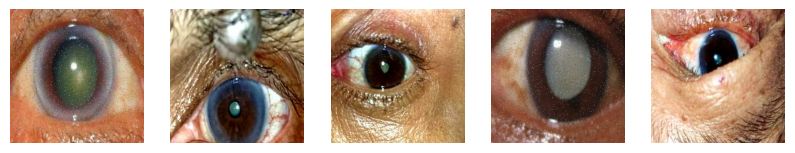


MataNormal
Total Images: 100
Resolution of First Image: (224, 224, 3)


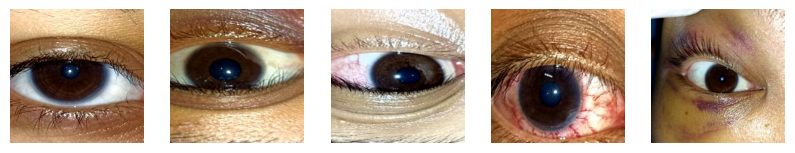


Mild_DR
Total Images: 100
Resolution of First Image: (512, 512, 3)


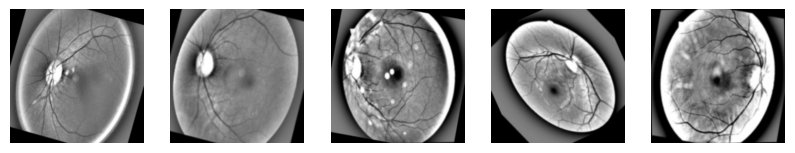


Moderate_DR
Total Images: 100
Resolution of First Image: (512, 512, 3)


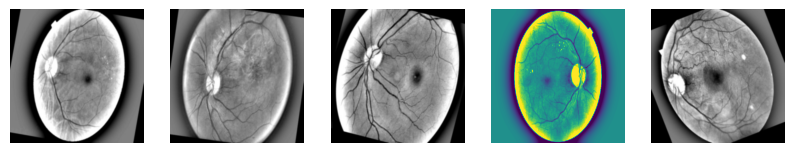


Normal_DR
Total Images: 100
Resolution of First Image: (512, 512, 3)


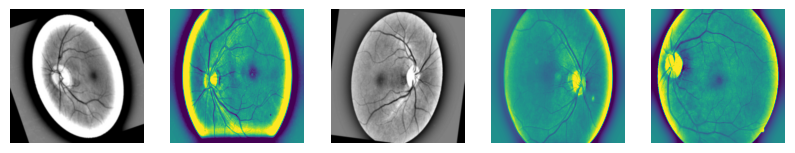


Proliferate_DR
Total Images: 100
Resolution of First Image: (512, 512, 3)


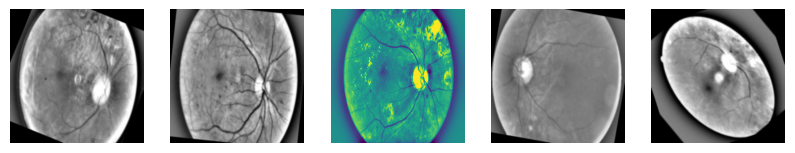


Severe_DR
Total Images: 100
Resolution of First Image: (512, 512, 3)


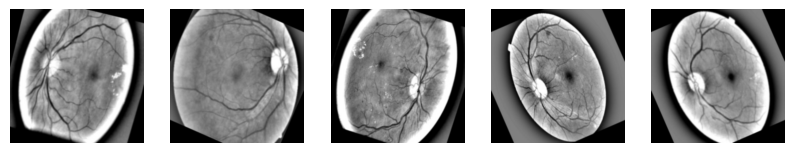


infected_eye
Total Images: 100
Resolution of First Image: (269, 422, 3)


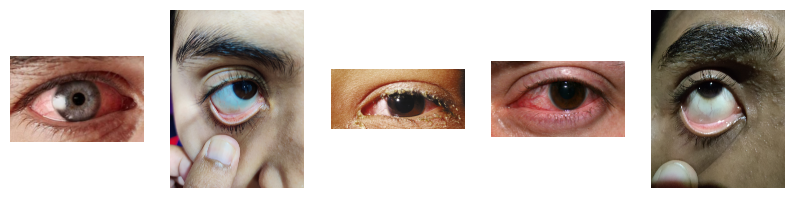


Immature
Total Images: 100
Resolution of First Image: (416, 416, 3)


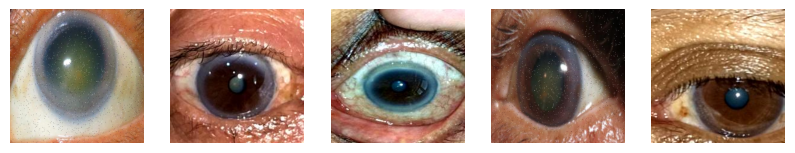

In [ ]:
for item in VAL_CLASSES:
  print("")
  print(item)
  class_dir = os.path.join(VAL_DIR, item)
  class_images = os.listdir(class_dir)

  # Total images in each classes
  num_images = len(class_images)
  print("Total Images:", num_images)

  # Resolution/size of each first image in class
  img_path = os.path.join(class_dir, class_images[0])
  img = mpimg.imread(img_path)
  image_shape = img.shape
  print("Resolution of First Image:", image_shape)

  # Show Image
  plt.figure(figsize=(10, 5))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

In [ ]:
# New Directory for Val Resized Dataset
resized1_dir = "/content/drive/MyDrive/Capstone/resized1"
os.makedirs(resized1_dir, exist_ok=True)

# Pixel Normalization
def normalize_image(image):
    normalized_image = image.astype(np.float32) / 255.0
    return normalized_image

# Resize and Normalize Images
for item in TRAIN_CLASSES:
    class_dir = os.path.join(VAL_DIR, item)
    class_images = os.listdir(class_dir)

    for i, img_path in enumerate(class_images):
        img = Image.open(os.path.join(class_dir, img_path))
        resized_img = img.resize((224, 224))
        normalized_img = normalize_image(np.array(resized_img))

        # Save Resized and Normalized Image to resized_dir
        save_path = os.path.join(resized1_dir, item, img_path)
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        Image.fromarray((normalized_img * 255).astype(np.uint8)).save(save_path)


Mature
Total Images: 100
Resolution of Arfter Resized: (224, 224, 3)


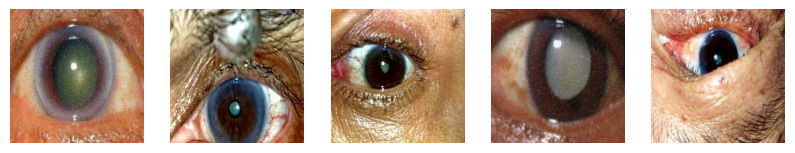


MataNormal
Total Images: 100
Resolution of Arfter Resized: (224, 224, 3)


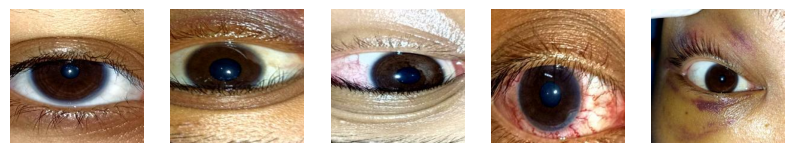


Mild_DR
Total Images: 100
Resolution of Arfter Resized: (224, 224, 3)


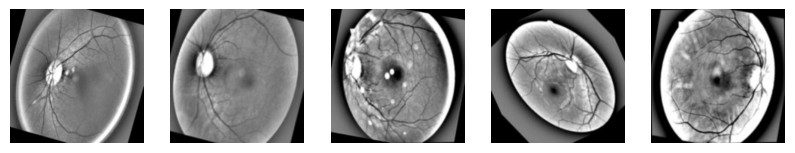


Moderate_DR
Total Images: 100
Resolution of Arfter Resized: (224, 224, 3)


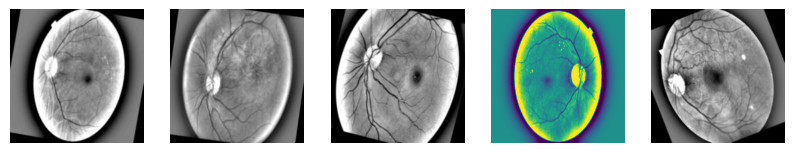


Normal_DR
Total Images: 100
Resolution of Arfter Resized: (224, 224, 3)


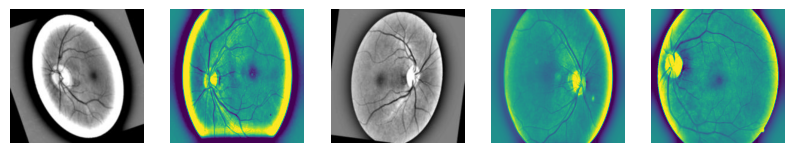


Proliferate_DR
Total Images: 100
Resolution of Arfter Resized: (224, 224, 3)


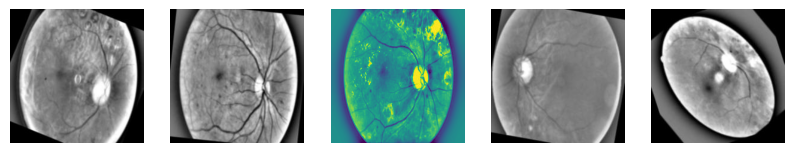


Severe_DR
Total Images: 100
Resolution of Arfter Resized: (224, 224, 3)


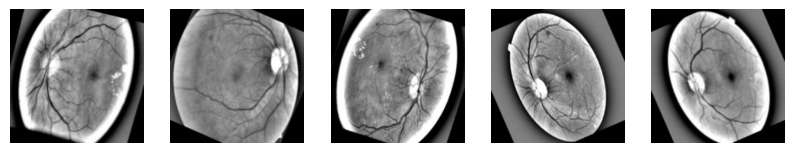


infected_eye
Total Images: 100
Resolution of Arfter Resized: (224, 224, 3)


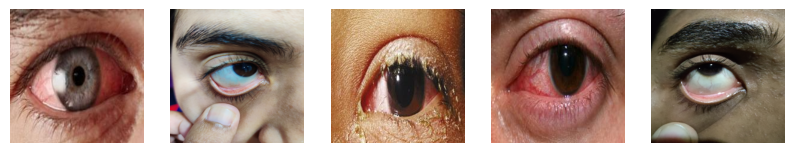


Immature
Total Images: 100
Resolution of Arfter Resized: (224, 224, 3)


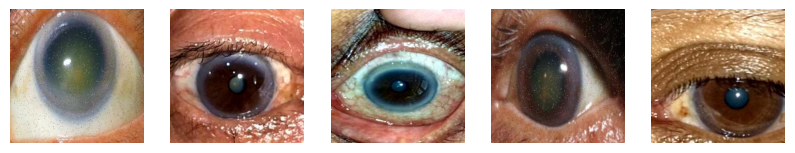

In [ ]:
resized_dir = "/content/drive/MyDrive/Capstone/resized1"

# Preview Image from Balanced Dataset
for item in VAL_CLASSES:
  print("")
  print(item)
  class1_dir = os.path.join(resized1_dir, item)
  class_images = os.listdir(class1_dir)

  # Total images in each classes
  num_images = len(class_images)
  print("Total Images:", num_images)

  # Resolution/size of each first image in class
  img_path = os.path.join(class1_dir, class_images[0])
  img = mpimg.imread(img_path)
  image_shape = img.shape
  print("Resolution of Arfter Resized:", image_shape)

  # Showing some images
  plt.figure(figsize=(10, 5))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class1_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

### **THIS IS RESIZED DATASET THAT HAS BEEN ZIPPED**

[RESIZED DATASET](https://drive.google.com/file/d/1Zaxt7yhg18WYpuT8eO94_2__6q6yIdOd/view?usp=sharing)